<a href="https://colab.research.google.com/github/yanlinhares/yan/blob/main/Prova_2_termodinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

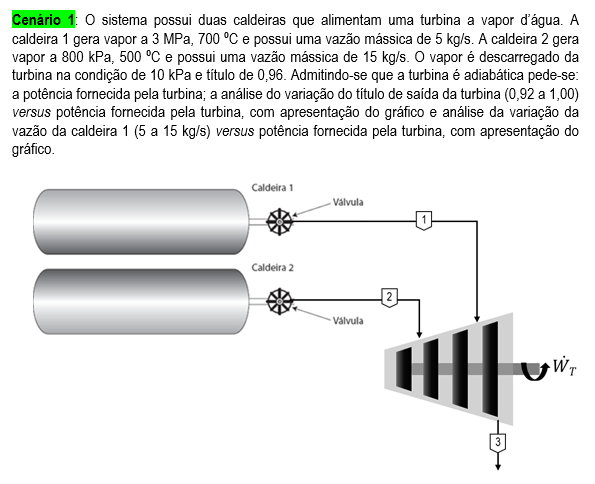

dados da questão

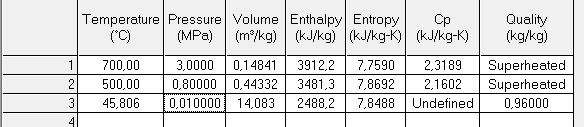

variação de entalpia por diferença de título


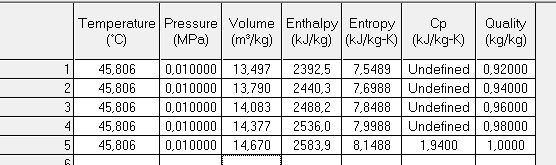

O valor da potência fornecida pela turbina é  22.0165  MW


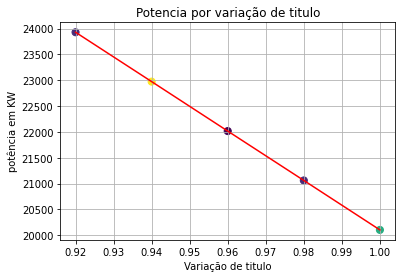

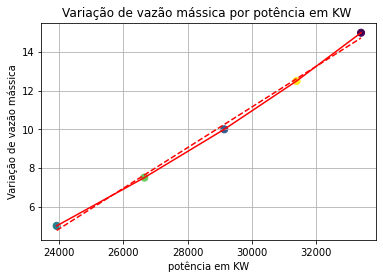

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ms1 = 5           # vazão mássica caldeira 1 kg/s
ms2 = 15          # vazão mássica caldeira 2 kg/s
# turbina adiabatica não troca calor
h = [0, 3912.2 , 3481.3 , 2488.2]     #KJ / Kg

# Wvc = (ms1*(h[1]) + ms2*(h[2]) ) - (ms1+ms2)*(h[3])

Wvc = (ms1*(h[1]) + ms2*(h[2]) ) - ( (ms1+ms2)*(h[3]) )

print("O valor da potência fornecida pela turbina é ",Wvc*0.001," MW")

y = np.linspace(0.92,1,5)
hy = [2392.5 , 2440.3 , 2488.2 , 2536, 2583.9]    #entalpias de variação de titulo
x = [0]*5                                         #potencias no eixo y 

for i in range(5):
  x[i]  = (ms1*(h[1]) + ms2*(h[2]) ) - ( (ms1+ms2)*(hy[i]) )

colors = np.random.rand(5)                        #gerando cores aleatorias
plt.plot(y,x,'r')
plt.scatter(y,x,c=colors,s=50,alpha=1)
plt.title('Potencia por variação de titulo')
plt.ylabel('potência em KW')
plt.xlabel('Variação de titulo')
plt.grid()
plt.show()


ms = np.linspace(5,15,5)        # vetor de vazoes de 5 a 15 kg/s
for i in range(5):
  x[i]  = (ms[i]*(h[1]) + ms2*(h[2]) ) - ( (ms[i]+ms2)*(hy[i]) )

colors = np.random.rand(5)                        #gerando cores aleatorias
plt.plot(x,ms,'r')
plt.scatter(x,ms,c=colors,s=50,alpha=1)
z = np.polyfit(x, ms, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Variação de vazão mássica por potência em KW ')
plt.ylabel('Variação de vazão mássica')
plt.xlabel('potência em KW')
plt.grid()
plt.show()












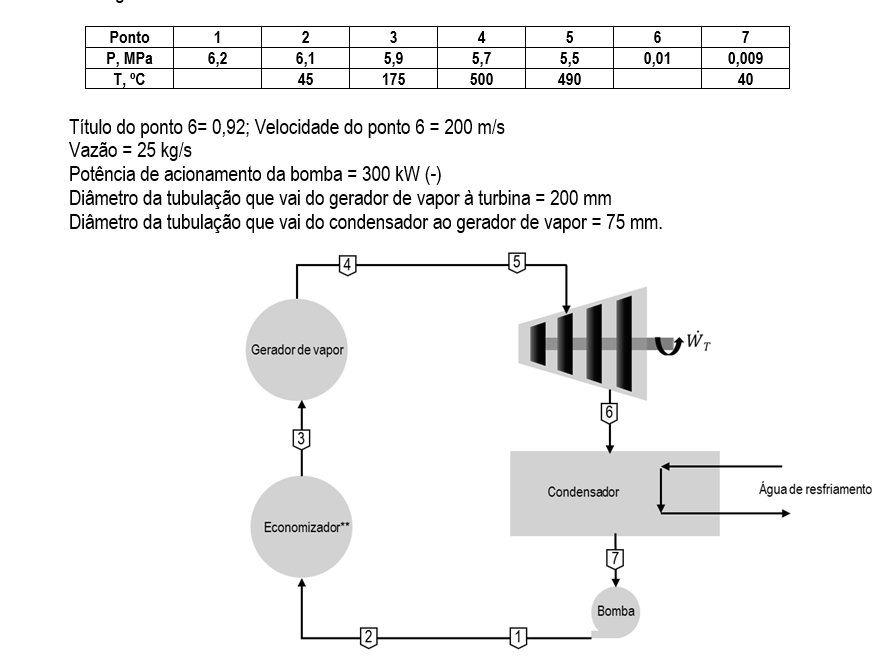

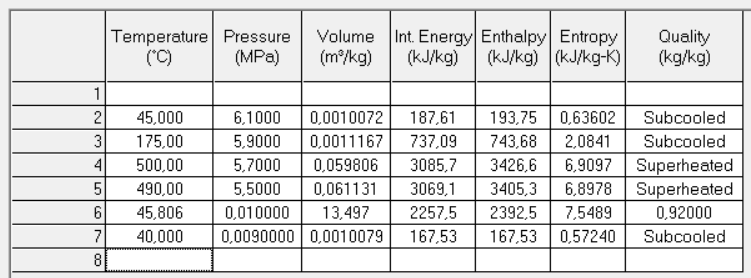






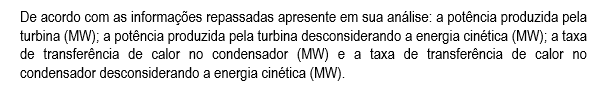

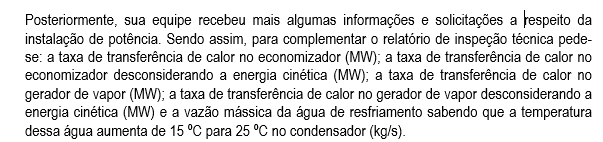

In [ ]:
from math import*
from numpy import*
import matplotlib.pyplot as plt

#a potência produzida pela turbina (MW); 

# Wvc = ms((h1-h2)+(v1**2/(2000)-v2**2/(2000)))

#Inputs

ms = 25   # Vazã mássica (kg/s)
h =[0,0,193.75,743.68,3426.6,3405.3,2392.5,167.53] # Entalpias

# ms= (1/v) * A * vel
# Qv= A * vel
# vel = (ms * v)/A

volm6= 0.061131                  # volume específico de entrada na turbina
A = ((200*0.001/2)**2 )*math.pi  # Área de entrada na turbina


v5 = ms * volm6 /A
v6 = 200   # m/s

Wvc = ms*((h[5]-h[6])+(v5**2/(2000)-v6**2/(2000)))           #cálculo da potênica fornecida pela turbina com energia cinética

print(f"A potência em MW da turbina considerando a energia cinética é: %.3f"%(Wvc/1000))

Wvc = ms*((h[5]-h[6]))    #cálculo da potênica fornecida pela turbina sem energia cinética

print(f"A potência em MW da turbina desconsiderando a energia cinética é: %.3f"%(Wvc/1000))

#---------------------------------------------------------------------------------------------------------

volm7= 0.0010079                # volume específico de saída do condensador
A7= ((75*0.001/2)**2)*math.pi   # Área de saída do condensador

v7 = ms * volm7/A7

Qvs =- ms*( (h[6]-h[7]) + (v6**2/(2000) - v7**2/(2000)))       #cálculo do calor trocado pelo condensador com energia cinética

print(f"A taxa de transferência de calor em MW no condensador considerando a energia cinética é: %.3f"%(Qvs/1000))

Qvs =-ms*((h[6]-h[7]))      #cálculo do calor trocado pelo condensador sem energia cinética           

print(f"A taxa de transferência de calor em MW do condensador desconsiderando a energia cinética é: %.3f"%(Qvs/1000))

#---------------------------------------------------------------------------------------------------------------

volm2 = 0.001
volm3 = 0.0011

v2 = ms * volm2 / A7
v3 = ms * volm3 / A7

Qvs = -ms*( (h[2]-h[3]) + (v2**2/(2000) - v3**2/(2000)))     #cálculo do calor trocado pelo economizador com energia cinética

print(f"A taxa de transferência de calor em MW no economizador considerando a energia cinética é: %.3f"%(Qvs/1000))

Qvs =-ms*((h[2]-h[3]))      #cálculo do calor trocado pelo economizador com energia cinética           

print(f"A taxa de transferência de calor em MW do economizador desconsiderando a energia cinética é: %.3f"%(Qvs/1000))

#-----------------------------------------------------------------------------------------------------------------

volm4 = 0.0598
v4 = ms* volm4/ A

Qvs = -ms*( (h[3]-h[4]) + (v3**2/(2000) - v4**2/(2000)))

print(f"A taxa de transferência de calor em MW do gerador de vapor considerando a energia cinética é: %.3f"%(Qvs/1000))

Qvs =-ms*((h[3]-h[4]))

print(f"A taxa de transferência de calor em MW do gerador de vapor desconsiderando a energia cinética é: %.3f"%(Qvs/1000))


# ---------------------------------------------------------------------------------------------------------------------
# descobrindo a vazão mássica
# sabendo que a traca de calor trocado, e a mesma já calculada anteriormente, a equação fica = 

# Qvs = -ms*((h1-h2)+(v1**2/(2000)-v2**2/(2000))) -> isolando a vazão mássica tem-se que :
# Qvs / ((h1-h2)+(v1**2/(2000)-v2**2/(2000))) = -ms
# as entalpias tiradas do minirefprop são:
hw1= 62.981
hw2= 104.83

# sabendo que a A taxa de transferência de calor em MW no condensador considerando a energia cinética é: -56.124 tem-se que:

m_res =- ms *(h[6]-h[7])/ (hw1-hw2) 

print(f"A vazão mássica na áqua de resfriamento é:",round(m_res,3),"Kg/s" )




A potência em MW da turbina considerando a energia cinética é: 24.850
A potência em MW da turbina desconsiderando a energia cinética é: 25.320
A taxa de transferência de calor em MW no condensador considerando a energia cinética é: -56.124
A taxa de transferência de calor em MW do condensador desconsiderando a energia cinética é: -55.624
A taxa de transferência de calor em MW no economizador considerando a energia cinética é: 13.748
A taxa de transferência de calor em MW do economizador desconsiderando a energia cinética é: 13.748
A taxa de transferência de calor em MW do gerador de vapor considerando a energia cinética é: 67.101
A taxa de transferência de calor em MW do gerador de vapor desconsiderando a energia cinética é: 67.073
A vazão mássica na áqua de resfriamento é: 1329.166 Kg/s


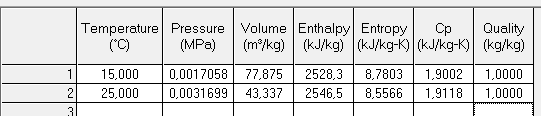

In [ ]:
from math import*
from numpy import*

#-----------------------------------------------------------------------
#a entalpia específica (kJ/kg) e o título da corrente que
#entra na turbina de baixa pressão (admitir que não há 
#transferência de calor do separador de umidade).

#Inputs

Vm_e3 = 62.874  # vazão mássica de entrada 3 (kg/s)
h_e  = 2517    # Entalpia na entrada 3 (kg/kJ)
h_s9 = 588     # Entalpia na saida 9
Vm_s9 = 4.662  # Vazão mássica na saída 9
Vm_s4 = (1-Vm_s9/Vm_e3)*Vm_e3 # Vazão mássica na saida 4

h_s4 =-(h_s9 * (Vm_s9/Vm_e3) - h_e) / (Vm_s4/Vm_e3)

print("A entalpia encontrada na saída 4 é:",round(h_s4,3)," kJ/kg")
print ( "O valor do título na saída 4 de acordo com o miniREFPROP é:0.9745")

#---------------------------------------------------------------------

# a potência gerada pela turbina de alta pressão (MW):

#inputs

m_e2 = 75.6   # vazão mássica de entrada em 2 
h_e2 = 2765   # entalpia de entrada em 2

m_s3 = 62.874 # Vazão mássica de saída em 3
h_s3 = 2517   # Entalpia de de saída em 3

m_s12 = 8.064 # Vazão mássica de saída em 12
h_s12 = 2517  # Entalpia de de saída em 12

m_s17 = 4.662 # Vazão mássica de saída em 17
h_s17 = 2593  # Entalpia de de saída em 17

W_alta =  m_e2 * ( h_e2 - ( h_s3*(m_s3/m_e2) + h_s12*(m_s12/m_e2) + h_s17*(m_s17/m_e2) ) )


print("A Potêcia na turbina de alta pressão é:" ,round(W_alta*0.001 , 3) ,"kW")

#------------------------------------------------------------------------
#a potência gerada pela turbina de baixa pressão (MW)

#inputs
m_s8 = 2.772 # Vazão mássica de saída em 17
h_s8 = 2459  # Entalpia de de saída em 17

m_s5 = (1-(m_s8/Vm_s4))*Vm_s4      # Vazão mássica de saída em 17
h_s5 = 2279                        # Entalpia de de saída em 17

W_baixa= Vm_s4 *(h_s4 - (h_s8*(m_s8/Vm_s4) + h_s5*(m_s5/Vm_s4)))

print("A Potêcia na turbina de baixa pressão é:" ,round(W_baixa*0.001 , 3) ,"kW")

#-------------------------------------------------------------------------

#A razão entre a potência total fornecida pelas
#duas turbinas e o calor transferido para a água no reator.

#input 

calor= 157000 # kW

razão = (W_alta + W_baixa)/calor

print("A razão entre a potência total fornecida pelas duas turbinas e o calor transferido para a água no reator é :",round(razão,3))

A entalpia encontrada na saída 4 é: 2671.487  kJ/kg
O valor do título na saída 4 de acordo com o miniREFPROP é:0.9745
A Potêcia na turbina de alta pressão é: 18.394 kW
A Potêcia na turbina de baixa pressão é: 22.348 kW
A razão entre a potência total fornecida pelas duas turbinas e o calor transferido para a água no reator é : 0.26
